In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx import gml
import numpy as np

In [2]:
#Input files
cluster_fp = "cluster.tsv"
graph_fp = "graph.gml" 

In [3]:
#Get the node that includes the desired protein
def get_node_by_protein(protein, cluster_tsv):
    cluster_df = pd.read_csv(cluster_tsv, sep="\t", header=None, colnames=["Node", "Protein"])
    cluster_df = cluster_df[cluster_df["Protein"] == protein]
    return cluster_df["Node"].values[0]

def get_node_neighborhood(graph_gml, node):
    G = nx.read_gml(graph_gml)
    return list(G.neighbors(node))

def output_cosmograph_tsv(cluster_tsv, graph_gml, protein):
    node = get_node_by_protein(protein, cluster_tsv)
    neighborhood = get_node_neighborhood(graph_gml, node)
    neighborhood.append(node)
    with open("cosmograph.tsv", "w") as f:
        f.write("Node\tProtein\n")
        for n in neighborhood:
            f.write(f"{n}\t{protein}\n")

In [4]:
graph_gml = '../data/test_data/test_GRAPH_Guaymas2020_hottest_clu30.gml'

In [5]:
#Read in graph!
G = gml.read_gml(graph_gml)

In [6]:
print(G)
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Graph with 2067 nodes and 374 edges
Number of nodes 2067
Number of edges 374
Average degree 0.3618771165940977


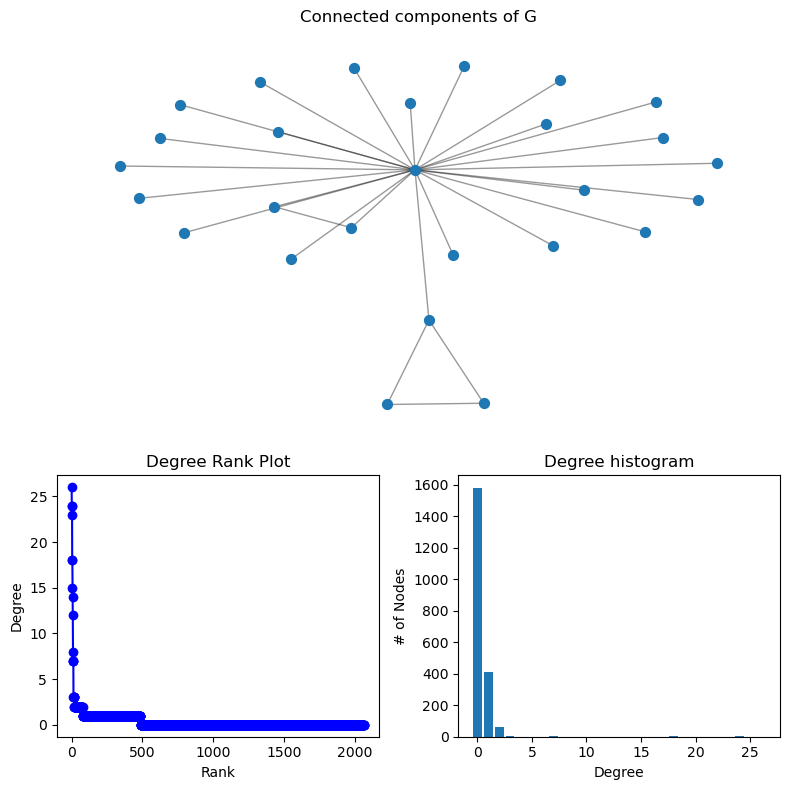

In [9]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
#there are different layouts: shell, spring, spectral, spiral, multipartite ,etc

nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=50)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4,)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'shell layout')

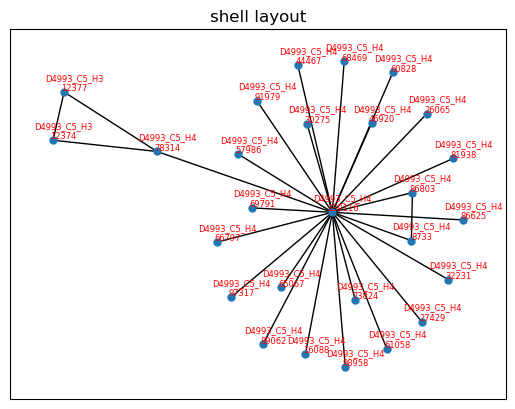

In [40]:
posGcc = nx.spring_layout(Gcc, seed = 1)
#generate new node labels & label locations so they won't overlap
new_labels = {}
offset_labels = {}
for ii in posGcc.keys():
    #text wrap
    new_labels[ii] = '\n'.join(ii.split('-scaffold_'))
    #right and high shift the label 
    offset_labels[ii]=np.array([posGcc[ii][0]+0.04,posGcc[ii][1]+0.03])
nx.draw_networkx_nodes(Gcc, posGcc,  node_size=25)
nx.draw_networkx_edges(Gcc, posGcc,)
nx.draw_networkx_labels(Gcc,offset_labels, 
                        labels = new_labels, 
                        font_size = 6,
                       font_color = 'r')
plt.title('shell layout')

Text(0.5, 1.0, 'spectral layout')

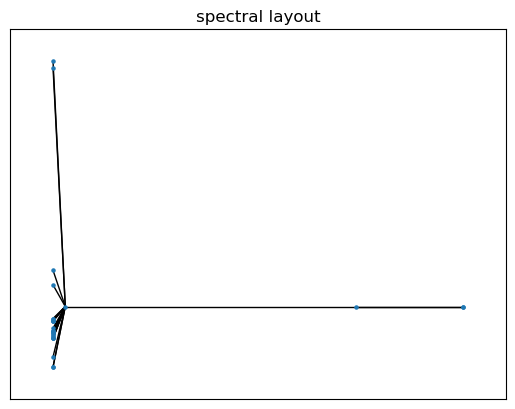

In [41]:
posGcc = nx.spectral_layout(Gcc)
nx.draw_networkx_nodes(Gcc, posGcc,  node_size=5)
nx.draw_networkx_edges(Gcc, posGcc,)
plt.title('spectral layout')

## degree & note name & rank

In [72]:
result_table = pd.DataFrame(G.degree()).rename(columns = {0:'Node',1:'degree'})

result_table = result_table.sort_values('degree',
                                        ascending = False).reset_index(drop = True).reset_index()
result_table.rename(columns = {'index':'rank'},inplace = True)
result_table['rank']  = result_table['rank']+1
result_table.head()

,rank,Node,degree
0,1,D4994_C39_H2-scaffold_139153,26
1,2,D4993_C5_H4-scaffold_130116,24
2,3,D4993_C5_H3-scaffold_468226,24
3,4,D4998_C2223_H1-scaffold_298951,23
4,5,D4998_C1112_H3-scaffold_288171,18


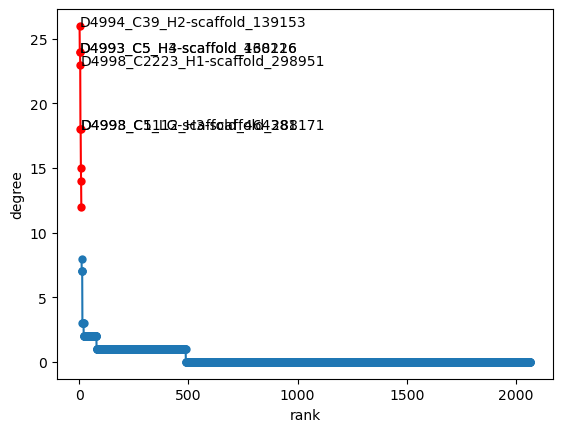

In [86]:
import seaborn as sns
ax1 = sns.lineplot(
data = result_table[result_table['rank']>=10],
x = 'rank',
y = 'degree',
marker = 'o',
markeredgecolor = 'none')
ax2 = sns.lineplot(
data = result_table[result_table['rank']<10],
x = 'rank',
y = 'degree',
marker = 'o',
markeredgecolor = 'none',
color = 'r')

temp = result_table[result_table['rank']<10]
for ii in range(0,6):
    ax2.text(temp['rank'][ii],temp['degree'][ii],temp['Node'][ii])

In [87]:
result_table.value_counts('degree')
#see if we can find node names for these

degree
0     1580
1      409
2       59
3        6
7        3
18       2
24       2
8        1
12       1
14       1
15       1
23       1
26       1
dtype: int64

# Interactive plot (save as test)

In [89]:
from pyvis.network import Network

In [90]:
# Plot with pyvis
net = Network(
    directed = True,
    select_menu = True, # Show part 1 in the plot (optional)
    filter_menu = True, # Show part 2 in the plot (optional)
)
net.show_buttons() # Show part 3 in the plot (optional)
net.from_nx(G) # Create directly from nx graph
net.show('test.html',notebook=False)

test.html


In [ ]:
#Write out smol graph to tsvs for cosmograph! 
output_nodes_tsv = 'data/GuaPO_clu30_nodes.tsv'
output_edges_tsv = 'data/GuaPO_clu30_edges.tsv'

with open(output_nodes_tsv, 'w') as node_file:
    node_file.write("NodeId\tlabel\n")  # Modify based on your node attributes
    for node, data in Guapo_G.nodes(data=True):
        # Write node and attributes to the file, ensure attributes match what's in your graph
        node_file.write(f"{node}\t{data.get('label', '')}\n")
print(f'saved nodes to {output_nodes_tsv}')
# Open a file to write the edge data
with open(output_edges_tsv, 'w') as edge_file:
    edge_file.write("Source\tTarget\tWeight\n")  # Modify if you have different or additional attributes
    for source, target, data in Guapo_G.edges(data=True):
        # Write edge and attributes to the file, ensure attributes match what's in your graph
        edge_file.write(f"{source}\t{target}\t{data.get('weight', '')}\n")
print(f'saved edges to {output_edges_tsv}')

Code snippet to make a shuffled fasta for making the test set: 

In [1]:
from Bio import SeqIO
import random

# Load your FASTA file
file_path = '../data/All_Asgards_042423.faa'

# Read all sequences into a list
records = list(SeqIO.parse(file_path, 'fasta'))

# Shuffle the list of records
random.shuffle(records)

# Write the shuffled records to a new file
shuffled_file_path = 'shuffled.fasta'
with open(shuffled_file_path, 'w') as output_handle:
    SeqIO.write(records, output_handle, 'fasta')


In [ ]:
data/graphs/updated_All_Asgards_042423.gml